## **Part C: Multi-Colinearity and stepwise regression**

In [ ]:
import pandas as pd
import numpy as np
train_model =  pd.read_csv("train_model_cleaned.csv")

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
train_model = train_model.drop('Unnamed: 0',axis=1)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

features = train_model.drop('Sales', axis=1)
target = train_model['Sales']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9274816366663516

In [13]:
importance = rf.feature_importances_
importance = pd.DataFrame(importance, index=X_train.columns, 
                          columns=["Importance"])


In [14]:
importance = importance.sort_values('Importance',ascending=False)

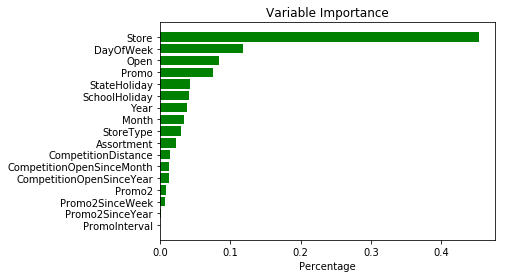

In [17]:
import matplotlib.pyplot as plt
names = X_train.columns
y_pos = np.arange(len(names))

fig, ax = plt.subplots()
ax.barh(y_pos, importance['Importance'], align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percentage')
ax.set_title('Variable Importance')

plt.show()


In [18]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns

In [20]:
vif

,VIF Factor,features
0,3.786605,Store
1,5.576773,DayOfWeek
2,6.442706,Open
3,1.889743,Promo
4,1.113292,StateHoliday
5,5.567040,SchoolHoliday
6,3.423561,Year
7,4.208558,Month
8,4.148219,StoreType
9,1.973837,Assortment


**Is there any multi-colinearity in the model?**

*All the variables which have Variance Inflation Factor greater than 5 are dependent on other variables. Here, Promo2 has 17.665. Therefore, Promo2 has highest multicolinearity and is dependent on other variables*

**In the multiple regression models are predictor variables independent of all the other predictor variables?**  

*Promo2 is dependent on other variables*

**In multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model.** 

*The most significant predictor variables are Store, DayOfWeek, Open, Promo, StateHoliday, SchoolHoliday, Year, Month, StoreType*